In [84]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [62]:
image=cv2.imread('img1.png')

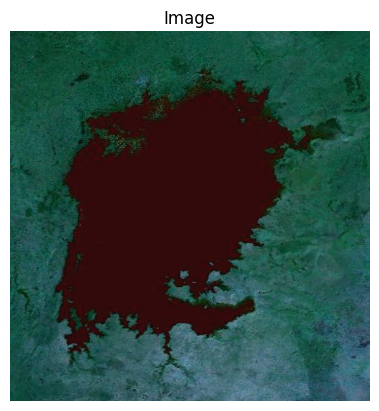

In [63]:
plt.imshow(image)
plt.title('Image')
plt.axis('off')
plt.show()

In [64]:
bgr_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

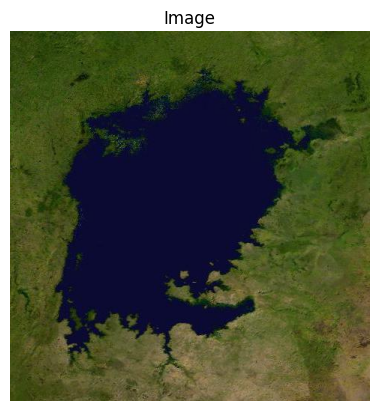

In [65]:
plt.imshow(bgr_image)
plt.title('Image')
plt.axis('off')
plt.show()

In [9]:
res_img=bgr_image.reshape((-1,3))

In [10]:
res_img.shape

(237120, 3)

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmean=KMeans(n_clusters=3,random_state=42)

In [13]:
kmean.fit(res_img)

E:\Major Project\Continual-Monument-Detection\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [68]:
centers=kmean.cluster_centers_.astype(np.uint8)

In [52]:
print(centers)

[[ 11  12  45]
 [ 64  79  22]
 [107 103  56]]


In [69]:
labels = kmean.labels_

In [70]:
labels

array([1, 1, 1, ..., 2, 2, 2])

In [71]:
for i, label in enumerate(labels):
    print(f"Image {i+1} belongs to cluster {label}")

Image 1 belongs to cluster 1
Image 2 belongs to cluster 1
Image 3 belongs to cluster 1
Image 4 belongs to cluster 1
Image 5 belongs to cluster 1
Image 6 belongs to cluster 1
Image 7 belongs to cluster 1
Image 8 belongs to cluster 1
Image 9 belongs to cluster 1
Image 10 belongs to cluster 1
Image 11 belongs to cluster 1
Image 12 belongs to cluster 1
Image 13 belongs to cluster 1
Image 14 belongs to cluster 1
Image 15 belongs to cluster 1
Image 16 belongs to cluster 1
Image 17 belongs to cluster 1
Image 18 belongs to cluster 1
Image 19 belongs to cluster 1
Image 20 belongs to cluster 1
Image 21 belongs to cluster 1
Image 22 belongs to cluster 1
Image 23 belongs to cluster 1
Image 24 belongs to cluster 1
Image 25 belongs to cluster 1
Image 26 belongs to cluster 1
Image 27 belongs to cluster 1
Image 28 belongs to cluster 1
Image 29 belongs to cluster 1
Image 30 belongs to cluster 1
Image 31 belongs to cluster 1
Image 32 belongs to cluster 1
Image 33 belongs to cluster 1
Image 34 belongs to

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [72]:
# Create a segmented image based on cluster centers
segmented_image = centers[labels].reshape(bgr_image.shape)
segmented_image.shape

(494, 480, 3)

AttributeError: 'numpy.ndarray' object has no attribute 'count'

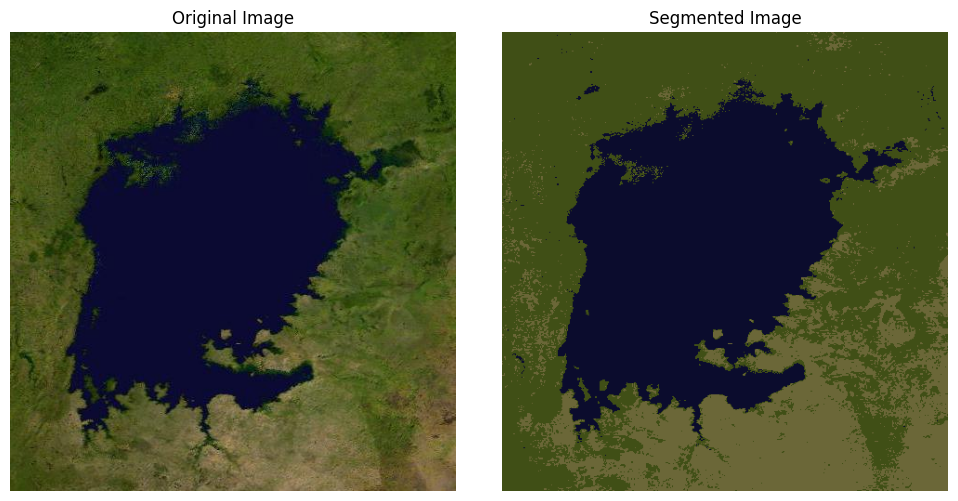

In [73]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(bgr_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Segmented Image')
plt.axis('off')

plt.tight_layout()
plt.show()

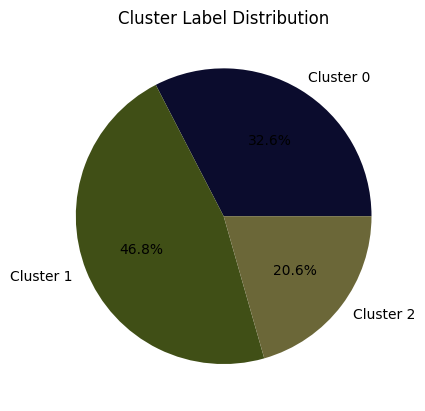

In [82]:
label_counts = np.bincount(labels, minlength=3)

# Create a pie chart for the cluster label distribution
plt.pie(label_counts, labels=[f'Cluster {i}' for i in range(3)], autopct='%1.1f%%', colors=centers / 255.0)
plt.title('Cluster Label Distribution')
plt.show()

In [95]:
label_counts

array([ 77285, 111054,  48781], dtype=int64)

In [100]:
uniq_label=[i for i in range(3)]
print(uniq_label)

[0, 1, 2]


In [108]:
cluster_info = pd.DataFrame({
    'Cluster': uniq_label,
    'Counts': label_counts,
    'Red': centers[:,0],
    'Green': centers[:,1],
    'Blue': centers[:,2]
})

In [109]:
cluster_info.head()

Cluster  Counts  Red  Green  Blue
0        0   77285   11     12    45
1        1  111054   64     79    22
2        2   48781  107    103    56

In [110]:
blue_per=cluster_info['Counts'][0]/sum(cluster_info['Counts'])

In [111]:
print(blue_per)

0.32593201754385964


In [112]:
blue_area=blue_per*200000
print(blue_area)

65186.40350877193


E:\Major Project\Continual-Monument-Detection\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Major Project\Continual-Monument-Detection\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Major Project\Continual-Monument-Detection\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Major Project\Continual-Monument-Detection\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1

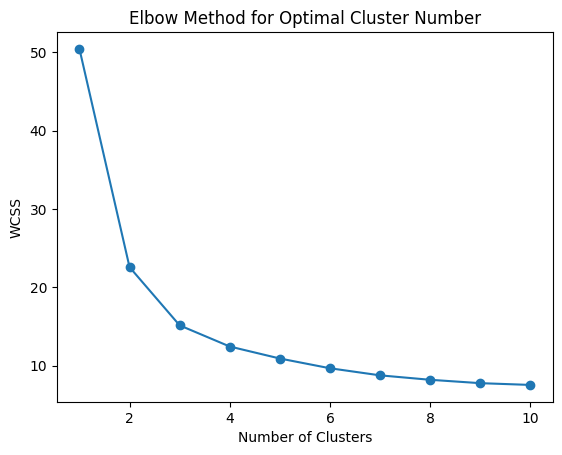

In [114]:
from scipy.spatial.distance import cdist

# Read the RGB image
image = cv2.imread('image.jpg')

# Flatten the image into a feature vector
image_vector = bgr_image.reshape(-1, 3)

# Create a range of possible cluster counts
clusters_range = range(1, 11)  # You can adjust the range as needed

# Calculate the within-cluster sum of squares (WCSS) for each cluster count
wcss = []
for num_clusters in clusters_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(image_vector)
    wcss.append(sum(np.min(cdist(image_vector, kmeans.cluster_centers_, 'euclidean'), axis=1)) / image_vector.shape[0])

# Plot the elbow curve
plt.plot(clusters_range, wcss, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
